In [12]:
import sys
sys.path.append(r'D:\Usuario\Pablo\Escritorio\workspace\metodos_numericos')

import numpy as np
import sympy as sp
import math as m
import matplotlib.pyplot as plt
from codigo import *
from modulos.menu import menu

In [13]:
Presicion().cambiarPresicionRepresentacion(0.0001)
Presicion.presicionActual()

4

In [14]:
menu("Método interpolador de Newton")


		████████████████████████████████████████████████████████████████████████████████████████████████████
		███                                                                                              ███
		███                                Método interpolador de Newton                                 ███
		███                                                                                              ███
		███               Integrantes: Sol Lopez, Pablo Foglia, Juan Caceffo, Alejo Menini               ███
		███                                                                                              ███
		████████████████████████████████████████████████████████████████████████████████████████████████████





In [15]:
lista_puntos = np.array([(2,-3),(1,-1),(-1,5),(-2,7),(-3,9)]) #ACA CARGAR LOS PUNTOS DEL PARCIAL
lista_puntos

array([[ 2, -3],
       [ 1, -1],
       [-1,  5],
       [-2,  7],
       [-3,  9]])

In [16]:
min_x = np.min(lista_puntos[:, 0])
print(f"Valor más pequeño en x: {min_x}")

Valor más pequeño en x: -3


In [17]:
poliNewton = NEquation(lista_puntos)
print("El polinomio generado es el siguiente: ")
poliNewton.imprimirEcuacion()

El polinomio generado es el siguiente: 


-2.0*x + (0.05*x - 0.1)*(x - 1)*(x + 1)*(x + 2) + (0.1667*x - 0.3334)*(x - 1)*(x + 1) + (0.3333*x - 0.6666)*(x - 1) + 1.0

In [18]:
gradoPolinomio = testeoGrado(lista_puntos, poliNewton.imprimirEcuacion())
print(f"El grado del polinomio obtendio es: {gradoPolinomio}")

El grado del polinomio obtendio es: 4


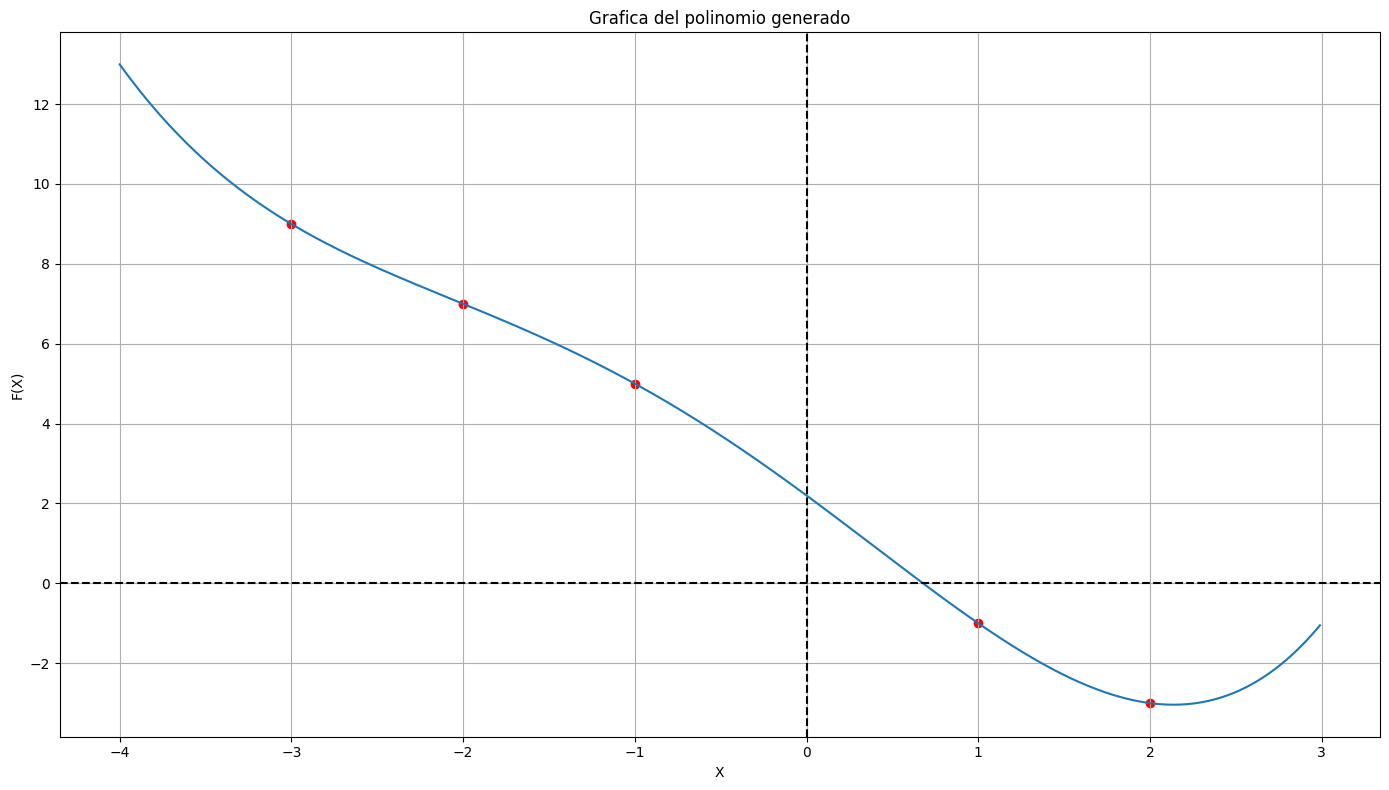

In [19]:
PUNTOS_X =[punto[0] for punto in lista_puntos]
PUNTOS_Y = [punto[1] for punto in lista_puntos]
graficar(PUNTOS_X, PUNTOS_Y, poliNewton.equation(), "Grafica del polinomio generado")

In [20]:

RAIZ = aproximarRaiz(min_x,Presicion.presicionActualEnDecimal(),poliNewton.equation())
print(f'Una de las raices de la función es: {RAIZ}')

Una de las raices de la función es: 0.6782


In [21]:

print("Polinomio de Larange con el mismo set de datos: ")
poli_larange = generar_funcion_lagrange(lista_puntos)
poli_larange

Polinomio de Larange con el mismo set de datos: 


(1/4 - x/4)*(18/5 - 9*x/5)*(-x - 2)*(-x/2 - 1/2) + (1/3 - x/3)*(7/2 - 7*x/4)*(-x - 1)*(x + 3) + (1/2 - x/2)*(10/3 - 5*x/3)*(x/2 + 3/2)*(x + 2) + (3 - 3*x)*(x/5 + 3/5)*(x/4 + 1/2)*(x/3 + 1/3) + (x/4 + 3/4)*(x/3 + 2/3)*(x/2 + 1/2)*(x - 2)

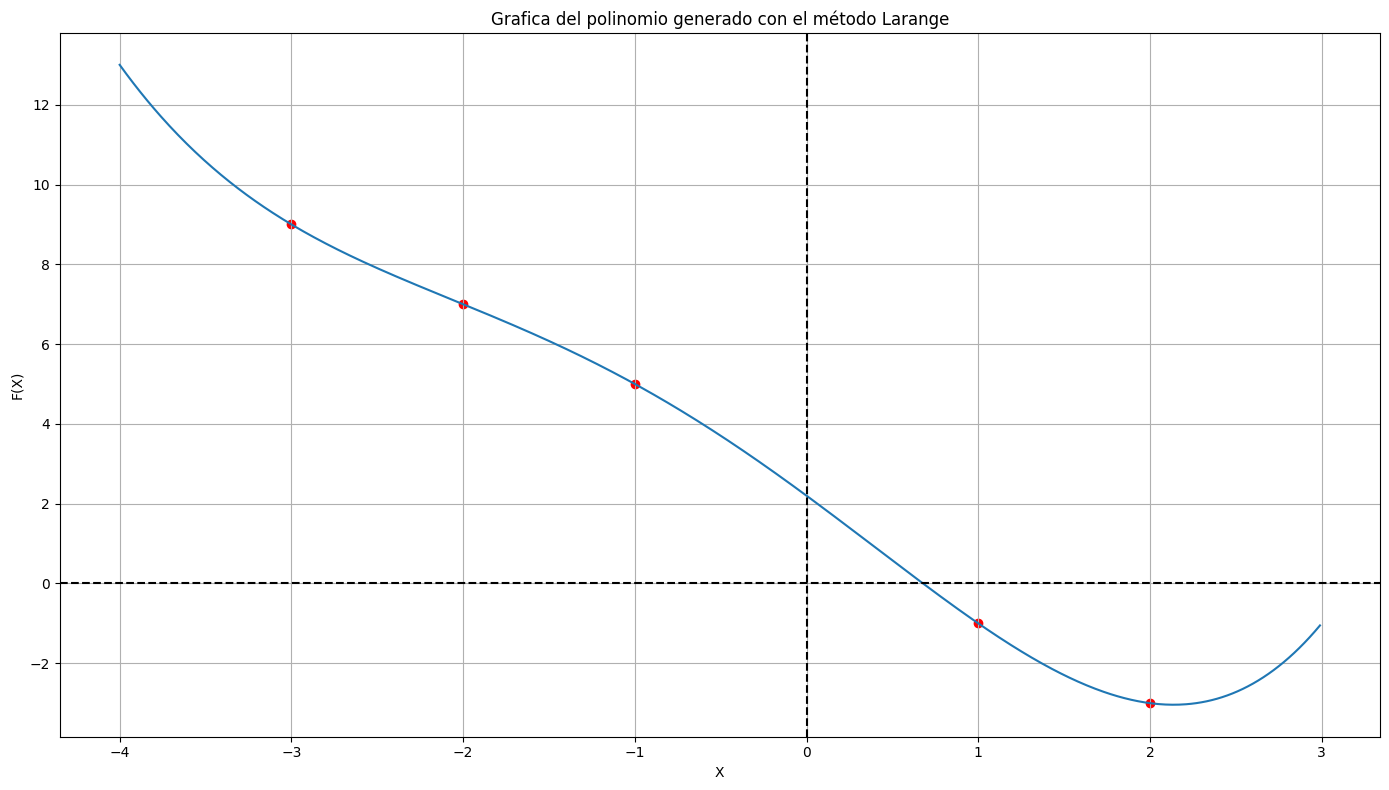

In [22]:
x = sp.symbols('x')
fLarange = sp.lambdify(x, poli_larange, modules=['numpy'] )

graficar(PUNTOS_X, PUNTOS_Y, fLarange, "Grafica del polinomio generado con el método Larange")